In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
def plot(image, anns):
  xs = anns['x'].to_list()
  ys = anns['y'].to_list()
  ws = anns['w'].to_list()
  hs = anns['h'].to_list()
  for x, y, w, h in zip(xs, ys, ws, hs):
    xmax = x+w
    ymax = y+h
    image = cv2.rectangle(image, (x,y), (xmax, ymax), (0, 220, 0), 1)
  return image

0.001993894577026367


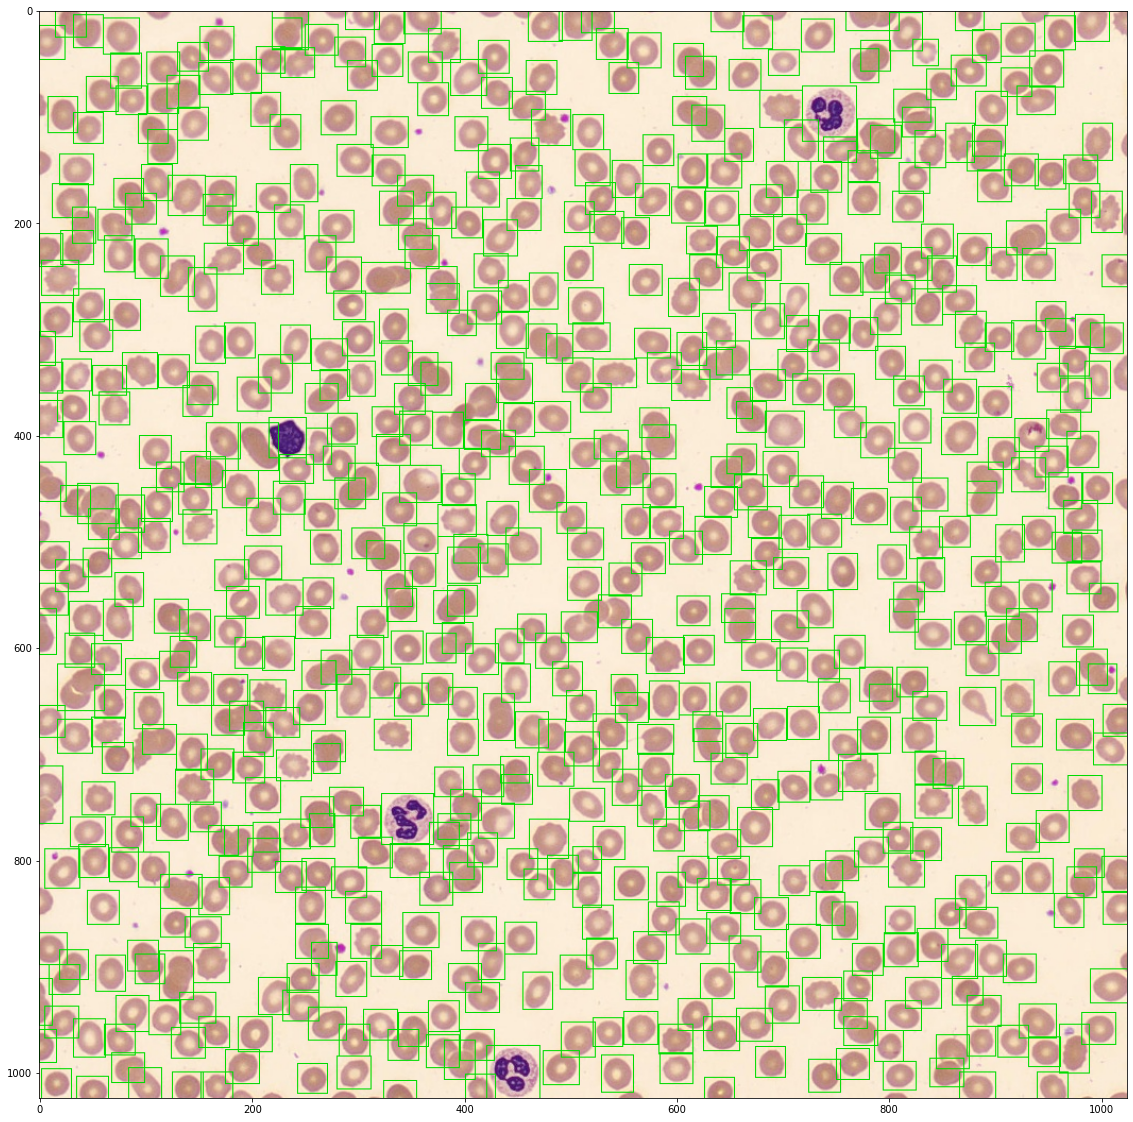

In [3]:
imgpath = 'rbc.jpg'
lblpath = 'label.pkl'
ann = pd.read_pickle(lblpath)
image = cv2.imread(imgpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
t0 = time.time()
sample = plot(image, ann)
print(time.time() - t0)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.imshow(sample)
plt.show()

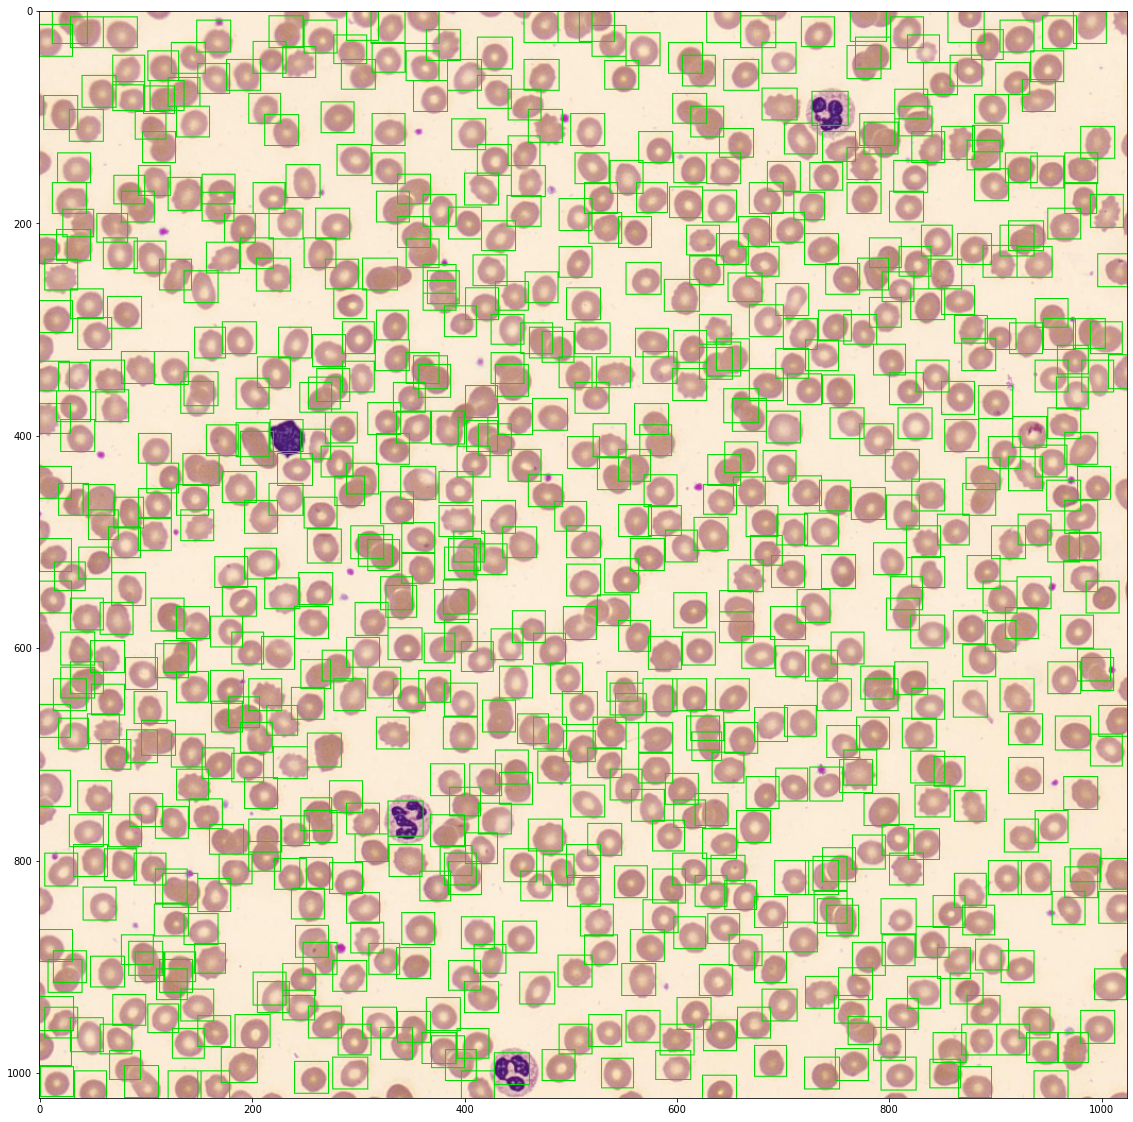

In [35]:
import centernet
import utils
import torch
image = cv2.imread(imgpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
model = centernet.build()
hm, regr = model.pred_on_img(image)
sample = utils.fullPLOT(image, hm, regr, 0.5, 0.5)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plt.imshow(sample)
plt.show()

In [36]:
ann

x    y   w   h      conf
0    904    9  32  30  0.926234
1    965  461  31  31  0.926129
2      5  793  31  31  0.925037
3     32  785  32  30  0.919168
4    171  976  34  33  0.918558
..   ...  ...  ..  ..       ...
744  253  345  30  30  0.506178
745  763    0  34  29  0.504375
746  369  965  31  30  0.502213
747  201  905  31  31  0.500740
748   82  677  29  31  0.500409

[749 rows x 5 columns]

In [9]:
bbox

array([[ 344.,    0.,   32.,   30.],
       [ 628.,    0.,   32.,   32.],
       [ 856.,    0.,   32.,   31.],
       ...,
       [ 865., 1003.,   31.,   27.],
       [ 937., 1003.,   30.,   27.],
       [ 625., 1006.,   31.,   29.]])

In [21]:
len(bbox_pass)

763

In [29]:
ann

x     y   w   h      conf
0     344     0  32  30  0.530985
1     628     0  32  32  0.552889
2     856     0  32  31  0.543267
3      11     0  35  32  0.527685
4     285     0  30  27  0.648148
...   ...   ...  ..  ..       ...
4528  621  1003  31  27  0.593953
4529  624  1002  32  29  0.647060
4530  865  1003  31  27  0.517055
4531  937  1003  30  27  0.586086
4532  625  1006  31  29  0.504117

[4533 rows x 5 columns]

In [ ]:
bbox_pass.tolist()